# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

There are 400 observations in our dataset.

#### Question 2. Create a summary table

In [5]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

The GRE scores deviate further from the mean than the GPA scores. This is because GPA is on a 4 point scale while GRE is on a 800 point scale.

#### Question 4. Drop data points with missing data


In [6]:
# first create a new dataset with only the columns you need, then drop na values:

df = df_raw.dropna(how='any')
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [7]:
df.describe()


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


We can tell that we dropped data because the counts changed. We can tell that it is the correct data because


#### Question 6. Create box plots for GRE and GPA

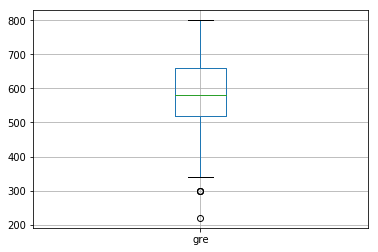

In [8]:
#boxplot 1
df.boxplot('gre')


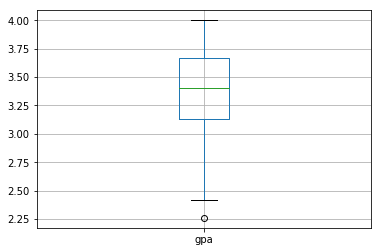

In [9]:
#boxplot 2 
df.boxplot('gpa')

#### Question 7. What do this plots show?

The boxplots above visuallize the information displayed in the summary tables above. In the GRE boxplot, we can see that the mean score is just below 600. The middle 50% of GRE scores were between 520 and 660. There are two low outliers at 300 and just over 200. 

In the GPA boxplot, we can see that the mean GPA is 3.4. Min The middle 50% of GPAs were between 3.1 and 3.7. There seems to be just one outlier at 2.25. The boxplots help us determine that the minimum GRE and minimum GPA are outliers.

#### Question 8. Describe each distribution 

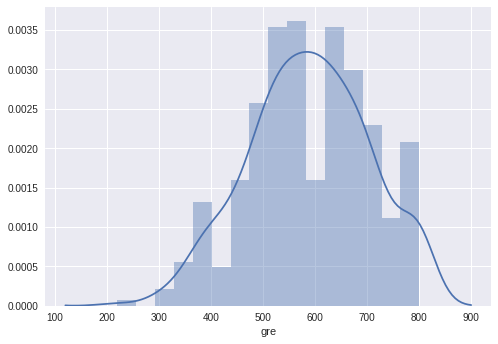

In [10]:
# plot the distribution of each variable 

import seaborn as sns
sns.distplot(df['gre'])

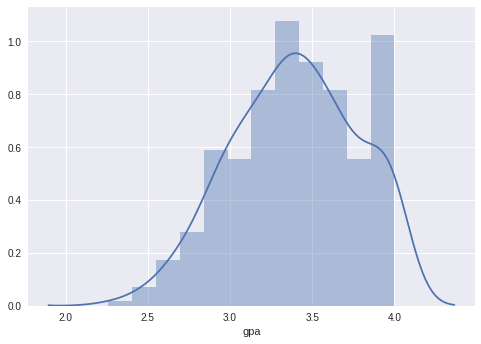

In [11]:
sns.distplot(df['gpa'])

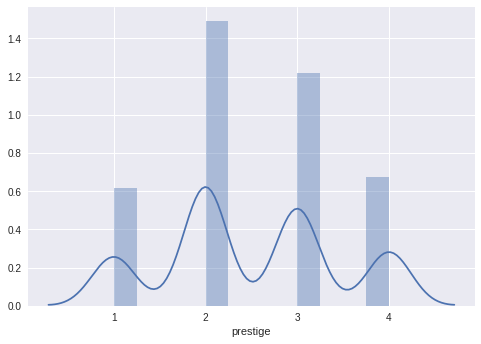

In [12]:
sns.distplot(df['prestige'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

No. None of the variables show a normal distribution, although GRE is closest. Both GRE and GPA are positively skewed distributions. Prestige is categorical and is furthest from a normal distribution.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Yes, if we are to assume a normal distribution in our model, we need to correct the distribution of these variables.

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


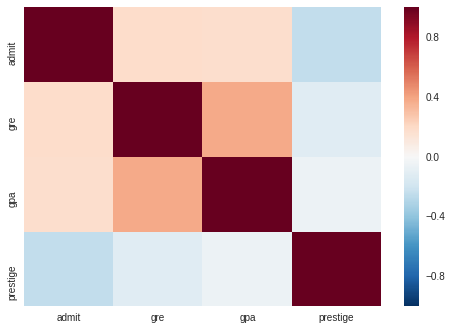

In [14]:
sns.heatmap(df.corr())

#### Question 12. What did you find?

There is not an extremely high correlation between these variables, but the highest is between GRE an GPA. We care most about the variables' correlation with 'admit'. The strongest correlation between a variable and the outcome 'admit' is a negative correlation between prestige and admit. Prestige is a categorical vairable where 1 is the most prestigious school.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Review summary statistics. 
Visualize the correlation between the variables by creating a heatmap. 
Log transform the data and use the LinearRegression object to find the p-value to better understand significance of the correlation between each variable and the outcome ('admit').

#### Question 14. What is your hypothesis? 

Students who attended the most prestigious schools (lowest numerical prestige ranking) for their undergraduate degree have the highest chance of being admitted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data